In [35]:
import gdax
%matplotlib inline


public_client = gdax.PublicClient()

In [5]:
import numpy as np

def diff(vals, delta=-1):
    shift = np.roll(vals, delta)
    diff = np.subtract(shift, vals)
    return diff[:delta]

# Save historical data, take number of points and granularity
from datetime import datetime, timedelta
from math import ceil
from time import sleep

def historic_rates(product, num_candles, granularity=60, max_per=401, initial=None):
    start = initial if initial else datetime.utcnow().replace(microsecond=0)
    delta = timedelta(seconds=granularity) * max_per
    full = ceil(num_candles / max_per)
    rates = []
    for i in range(1, full + 1):
        frm = start - (delta * i)
        to  = frm + delta
        print('From: {}, To: {}'.format(frm.isoformat(), to.isoformat()))
        rates.extend(public_client.get_product_historic_rates(product, start=frm.isoformat(), end=to.isoformat(), granularity=granularity))
        sleep(1)
    return rates


In [111]:

rates = historic_rates('ETH-USD', 100000)


From: 2017-12-30T23:44:17, To: 2017-12-31T06:25:17
From: 2017-12-30T17:03:17, To: 2017-12-30T23:44:17
From: 2017-12-30T10:22:17, To: 2017-12-30T17:03:17
From: 2017-12-30T03:41:17, To: 2017-12-30T10:22:17
From: 2017-12-29T21:00:17, To: 2017-12-30T03:41:17
From: 2017-12-29T14:19:17, To: 2017-12-29T21:00:17
From: 2017-12-29T07:38:17, To: 2017-12-29T14:19:17
From: 2017-12-29T00:57:17, To: 2017-12-29T07:38:17
From: 2017-12-28T18:16:17, To: 2017-12-29T00:57:17
From: 2017-12-28T11:35:17, To: 2017-12-28T18:16:17
From: 2017-12-28T04:54:17, To: 2017-12-28T11:35:17
From: 2017-12-27T22:13:17, To: 2017-12-28T04:54:17
From: 2017-12-27T15:32:17, To: 2017-12-27T22:13:17
From: 2017-12-27T08:51:17, To: 2017-12-27T15:32:17
From: 2017-12-27T02:10:17, To: 2017-12-27T08:51:17
From: 2017-12-26T19:29:17, To: 2017-12-27T02:10:17
From: 2017-12-26T12:48:17, To: 2017-12-26T19:29:17
From: 2017-12-26T06:07:17, To: 2017-12-26T12:48:17
From: 2017-12-25T23:26:17, To: 2017-12-26T06:07:17
From: 2017-12-25T16:45:17, To: 

ConnectionError: HTTPSConnectionPool(host='api.gdax.com', port=443): Max retries exceeded with url: /products/ETH-USD/candles?start=2017-12-11T18%3A35%3A17&end=2017-12-12T01%3A16%3A17&granularity=60 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x11a246048>: Failed to establish a new connection: [Errno 50] Network is down',))

In [78]:
import pandas as pd
times_l = [x[0] for x in rates]
prices_l = [x[4] for x in rates]
times_l.reverse()
prices_l.reverse()

times = pd.Series(times_l).astype("datetime64[s]")
time_price = pd.Series(prices_l, times)

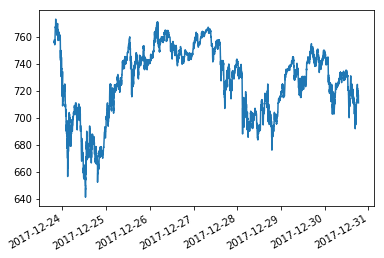

In [79]:
time_price.plot(figsize=(20,10))

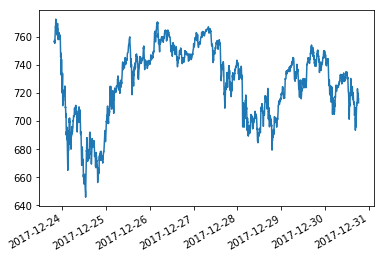

In [80]:
mvag_5 = time_price.rolling(window=5,center=False).mean()
mvag_5.plot()

In [81]:
mvag_50 = time_price.rolling(window=50,center=False).mean()
#mvag_50.plot()

In [82]:
diff_5_50 = mvag_5 - mvag_50

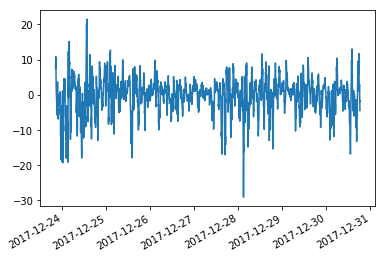

In [83]:
diff_5_50.plot()

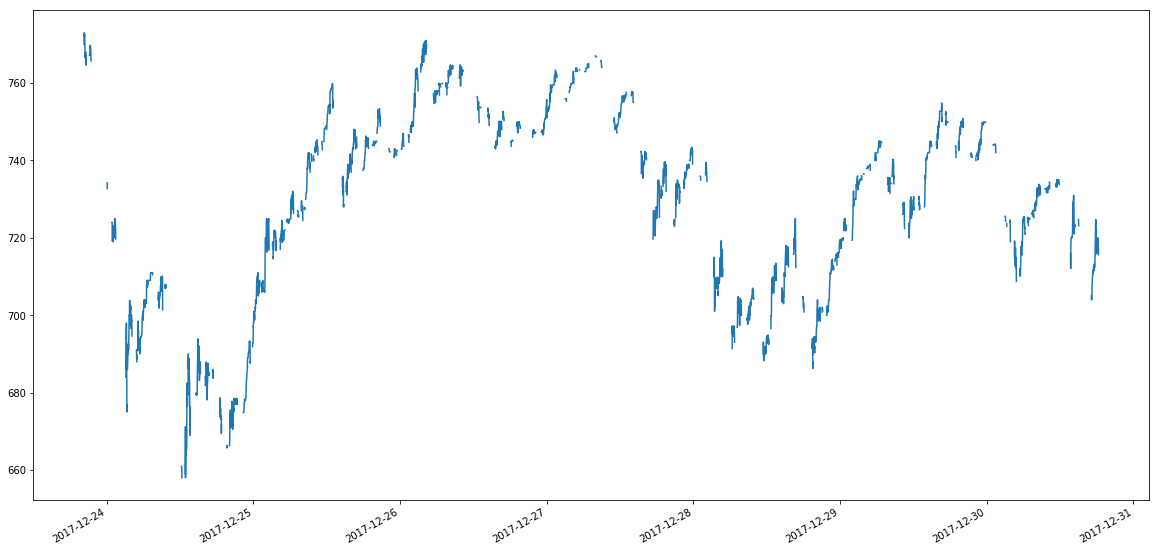

In [109]:
buys = time_price.where(diff_5_50 > 1)
buys.plot(figsize=(20,10))

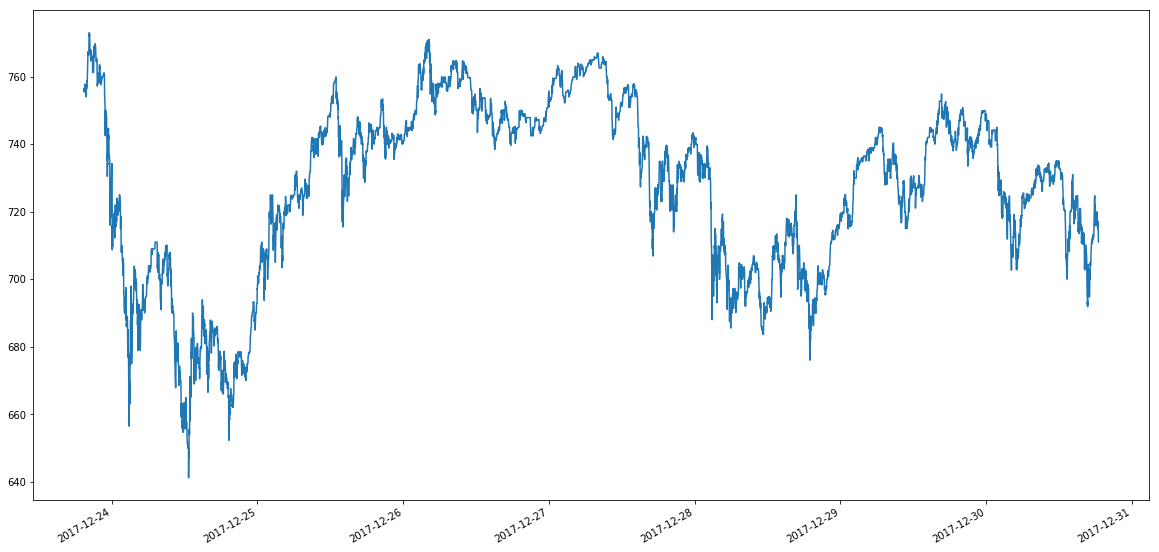

In [110]:
time_price.plot(figsize=(20,10))

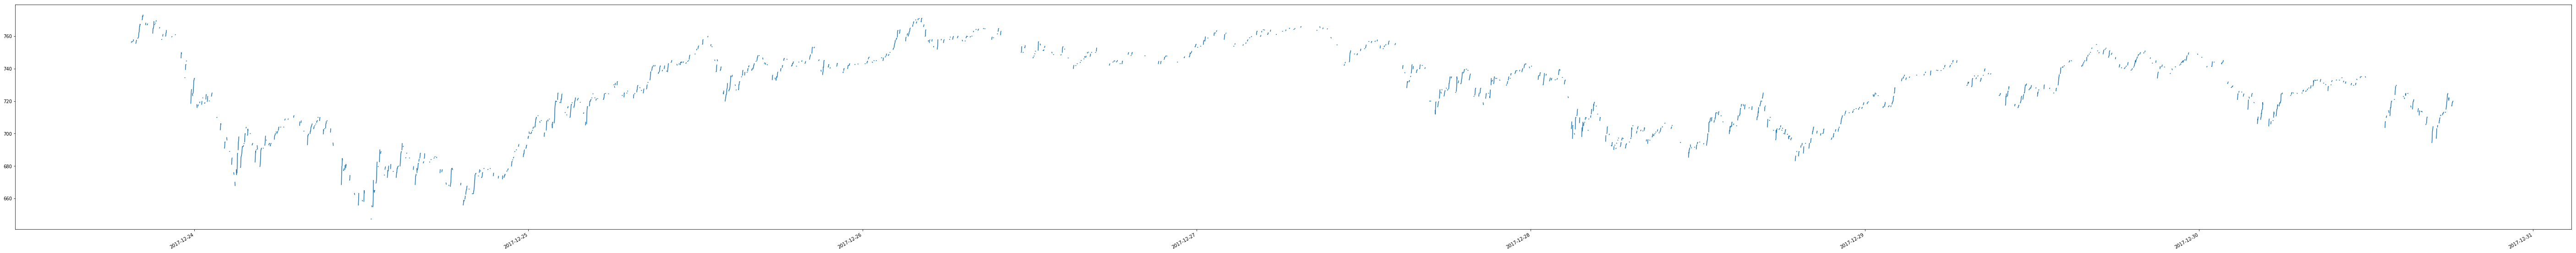

In [108]:
mvag_3 = time_price.rolling(window=3,center=False).mean()
diff_1_3 = time_price - mvag_3
#diff_1_3.plot()
buys = time_price.where(diff_1_3 > 0.2)
buys.plot(figsize=(20,10))